<a href="https://colab.research.google.com/github/jeevanshrestha/House-Price-Prediction-XGBoost-Regression/blob/main/House_Prices_Prediction_Advanced_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import re

In [4]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [102]:

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [10]:
df_train = pd.read_csv('house-price-train.csv',index_col='Id', na_values='NA')
df_test = pd.read_csv('house-price-test.csv',index_col='Id', na_values='NA')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [8]:
df_train.shape

(1460, 80)

In [9]:
df_test.shape

(1459, 79)

In [12]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [11]:
numerical_columns = df_train.select_dtypes(include=['number']).columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

In [56]:
df_train[categorical_columns].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                            
1        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

   Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
Id                          ...                                                 
1       CollgCr       Norm  ...     Attchd          RFn         TA         TA   
2       Veenker      Feedr  ...     Attchd          RFn         TA         TA   
3       CollgCr       Norm  ...     Attchd          RFn         TA         TA   
4       Crawfor       Norm  ...     Detchd          Unf         TA         TA   
5       NoRidge       Norm  ...     Attchd          RFn         TA         TA   

   PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
Id                                                             
1           Y    NaN   NaN         NaN       WD        Normal  
2           Y    NaN   NaN         NaN       WD        Normal  
3           Y    NaN   NaN         NaN       WD        Normal  
4           Y    NaN   NaN         NaN       WD       Abnorml  
5           Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [57]:
df_train[numerical_columns].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
Id                                                    ...               
1           2003       196.0         706           0  ...           0   
2           1976         0.0         978           0  ...         298   
3           2002       162.0         486           0  ...           0   
4           1970         0.0         216           0  ...           0   
5           2000       350.0         655           0  ...         192   

    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                          
1            61              0          0            0         0        0   
2             0              0          0            0         0        0   
3            42              0          0            0         0        0   
4            35            272          0            0         0        0   
5            84              0          0            0         0        0   

    MoSold  YrSold  SalePrice  
Id                             
1        2    2008     208500  
2        5    2007     181500  
3        9    2008     223500  
4        2    2006     140000  
5       12    2008     250000  

[5 rows x 37 columns]

## Data Analytics

```
# This is formatted as code
```



In [18]:

# Calculate missing percentages
categorical_missing_percentages = df_train[categorical_columns].isnull().sum() / len(df_train) * 100
categorical_missing_percentages = categorical_missing_percentages[categorical_missing_percentages > 0]

categorical_missing_percentages

Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

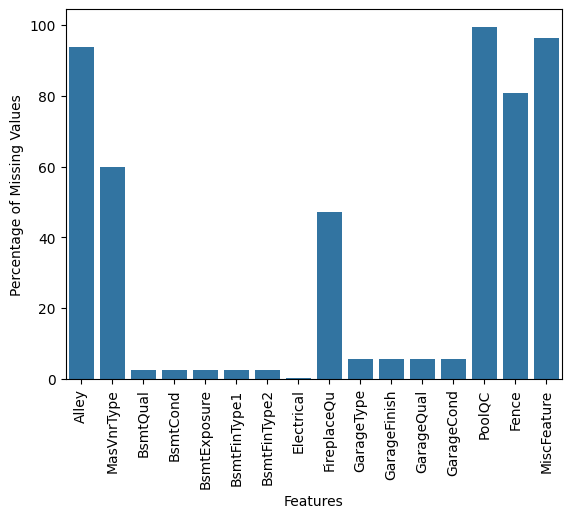

In [19]:
# Create the barplot
sns.barplot(x=categorical_missing_percentages.index, y=categorical_missing_percentages.values)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Label the axes
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')

# Display the plot
plt.show()

In [20]:
# Calculate missing percentages for numerical columns
numerical_missing_percentages = df_train[numerical_columns].isnull().sum() / len(df_train) * 100
numerical_missing_percentages = numerical_missing_percentages[numerical_missing_percentages > 0]

numerical_missing_percentages

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

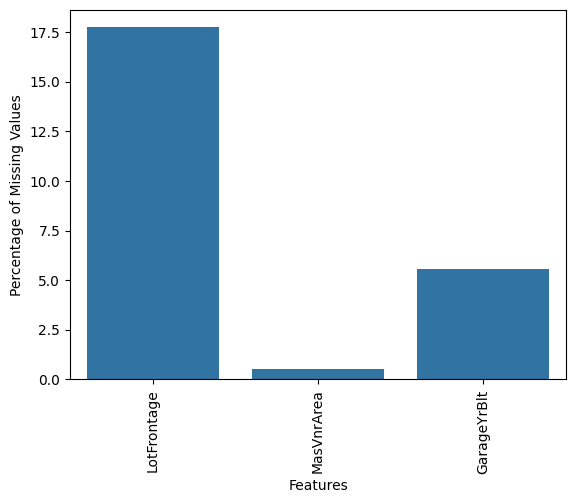

In [21]:
# Create the barplot
sns.barplot(x=numerical_missing_percentages.index, y=numerical_missing_percentages.values)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Label the axes
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')

# Display the plot
plt.show()

In [23]:
garage_columns = df_train.columns[df_train.columns.str.contains('Garage', case=False)]
df_train[garage_columns].loc[df_train[garage_columns].isna().any(axis=1)]

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
Id                                                                             
40          NaN          NaN          NaN           0           0        NaN   
49          NaN          NaN          NaN           0           0        NaN   
79          NaN          NaN          NaN           0           0        NaN   
89          NaN          NaN          NaN           0           0        NaN   
90          NaN          NaN          NaN           0           0        NaN   
...         ...          ...          ...         ...         ...        ...   
1350        NaN          NaN          NaN           0           0        NaN   
1408        NaN          NaN          NaN           0           0        NaN   
1450        NaN          NaN          NaN           0           0        NaN   
1451        NaN          NaN          NaN           0           0        NaN   
1454        NaN          NaN          NaN           0           0        NaN   

     GarageCond  
Id               
40          NaN  
49          NaN  
79          NaN  
89          NaN  
90          NaN  
...         ...  
1350        NaN  
1408        NaN  
1450        NaN  
1451        NaN  
1454        NaN  

[81 rows x 7 columns]

## Exploratory Data Analytics (EDA)

#### Target Variable Analysis

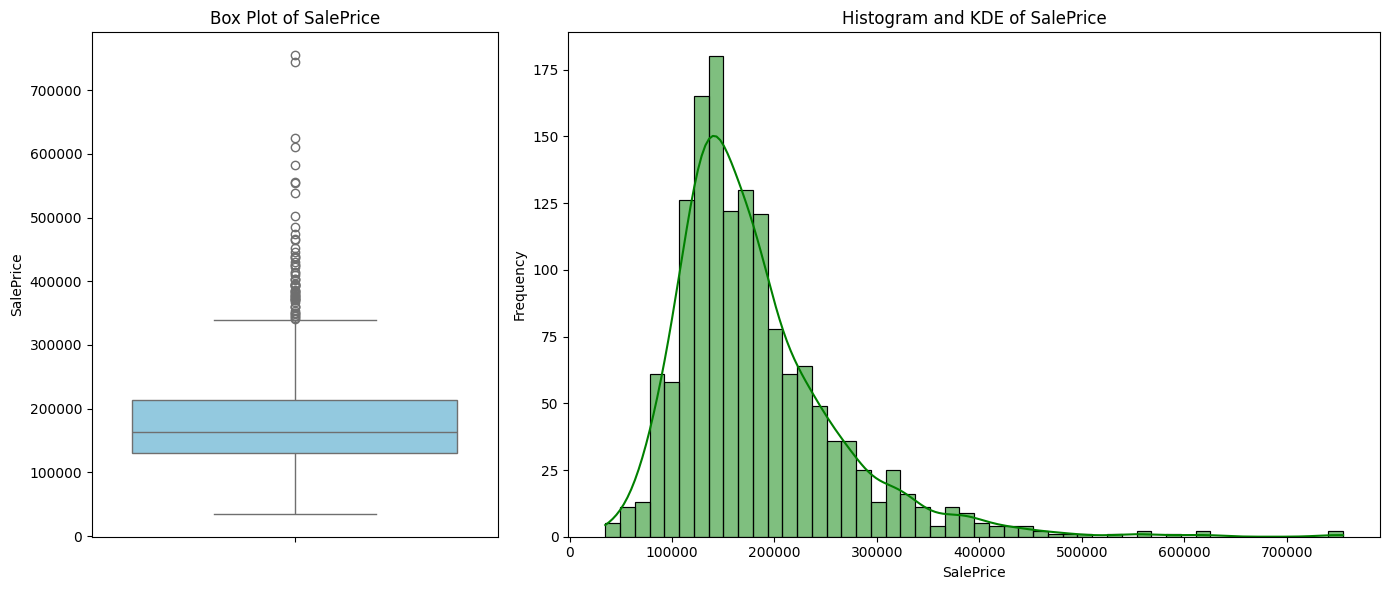

In [46]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]})

# Box plot on the left
sns.boxplot(y=df_train['SalePrice'], ax=axes[0], color='skyblue')
axes[0].set(title='Box Plot of SalePrice', xlabel='', ylabel='SalePrice')

# Histogram with KDE on the right
sns.histplot(df_train['SalePrice'], kde=True, bins=50, ax=axes[1], color='green')
axes[1].set(title='Histogram and KDE of SalePrice', xlabel='SalePrice', ylabel='Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
df_train[categorical_columns].shape

(1460, 43)

### Categorical Variables Distribution with Sales Prics

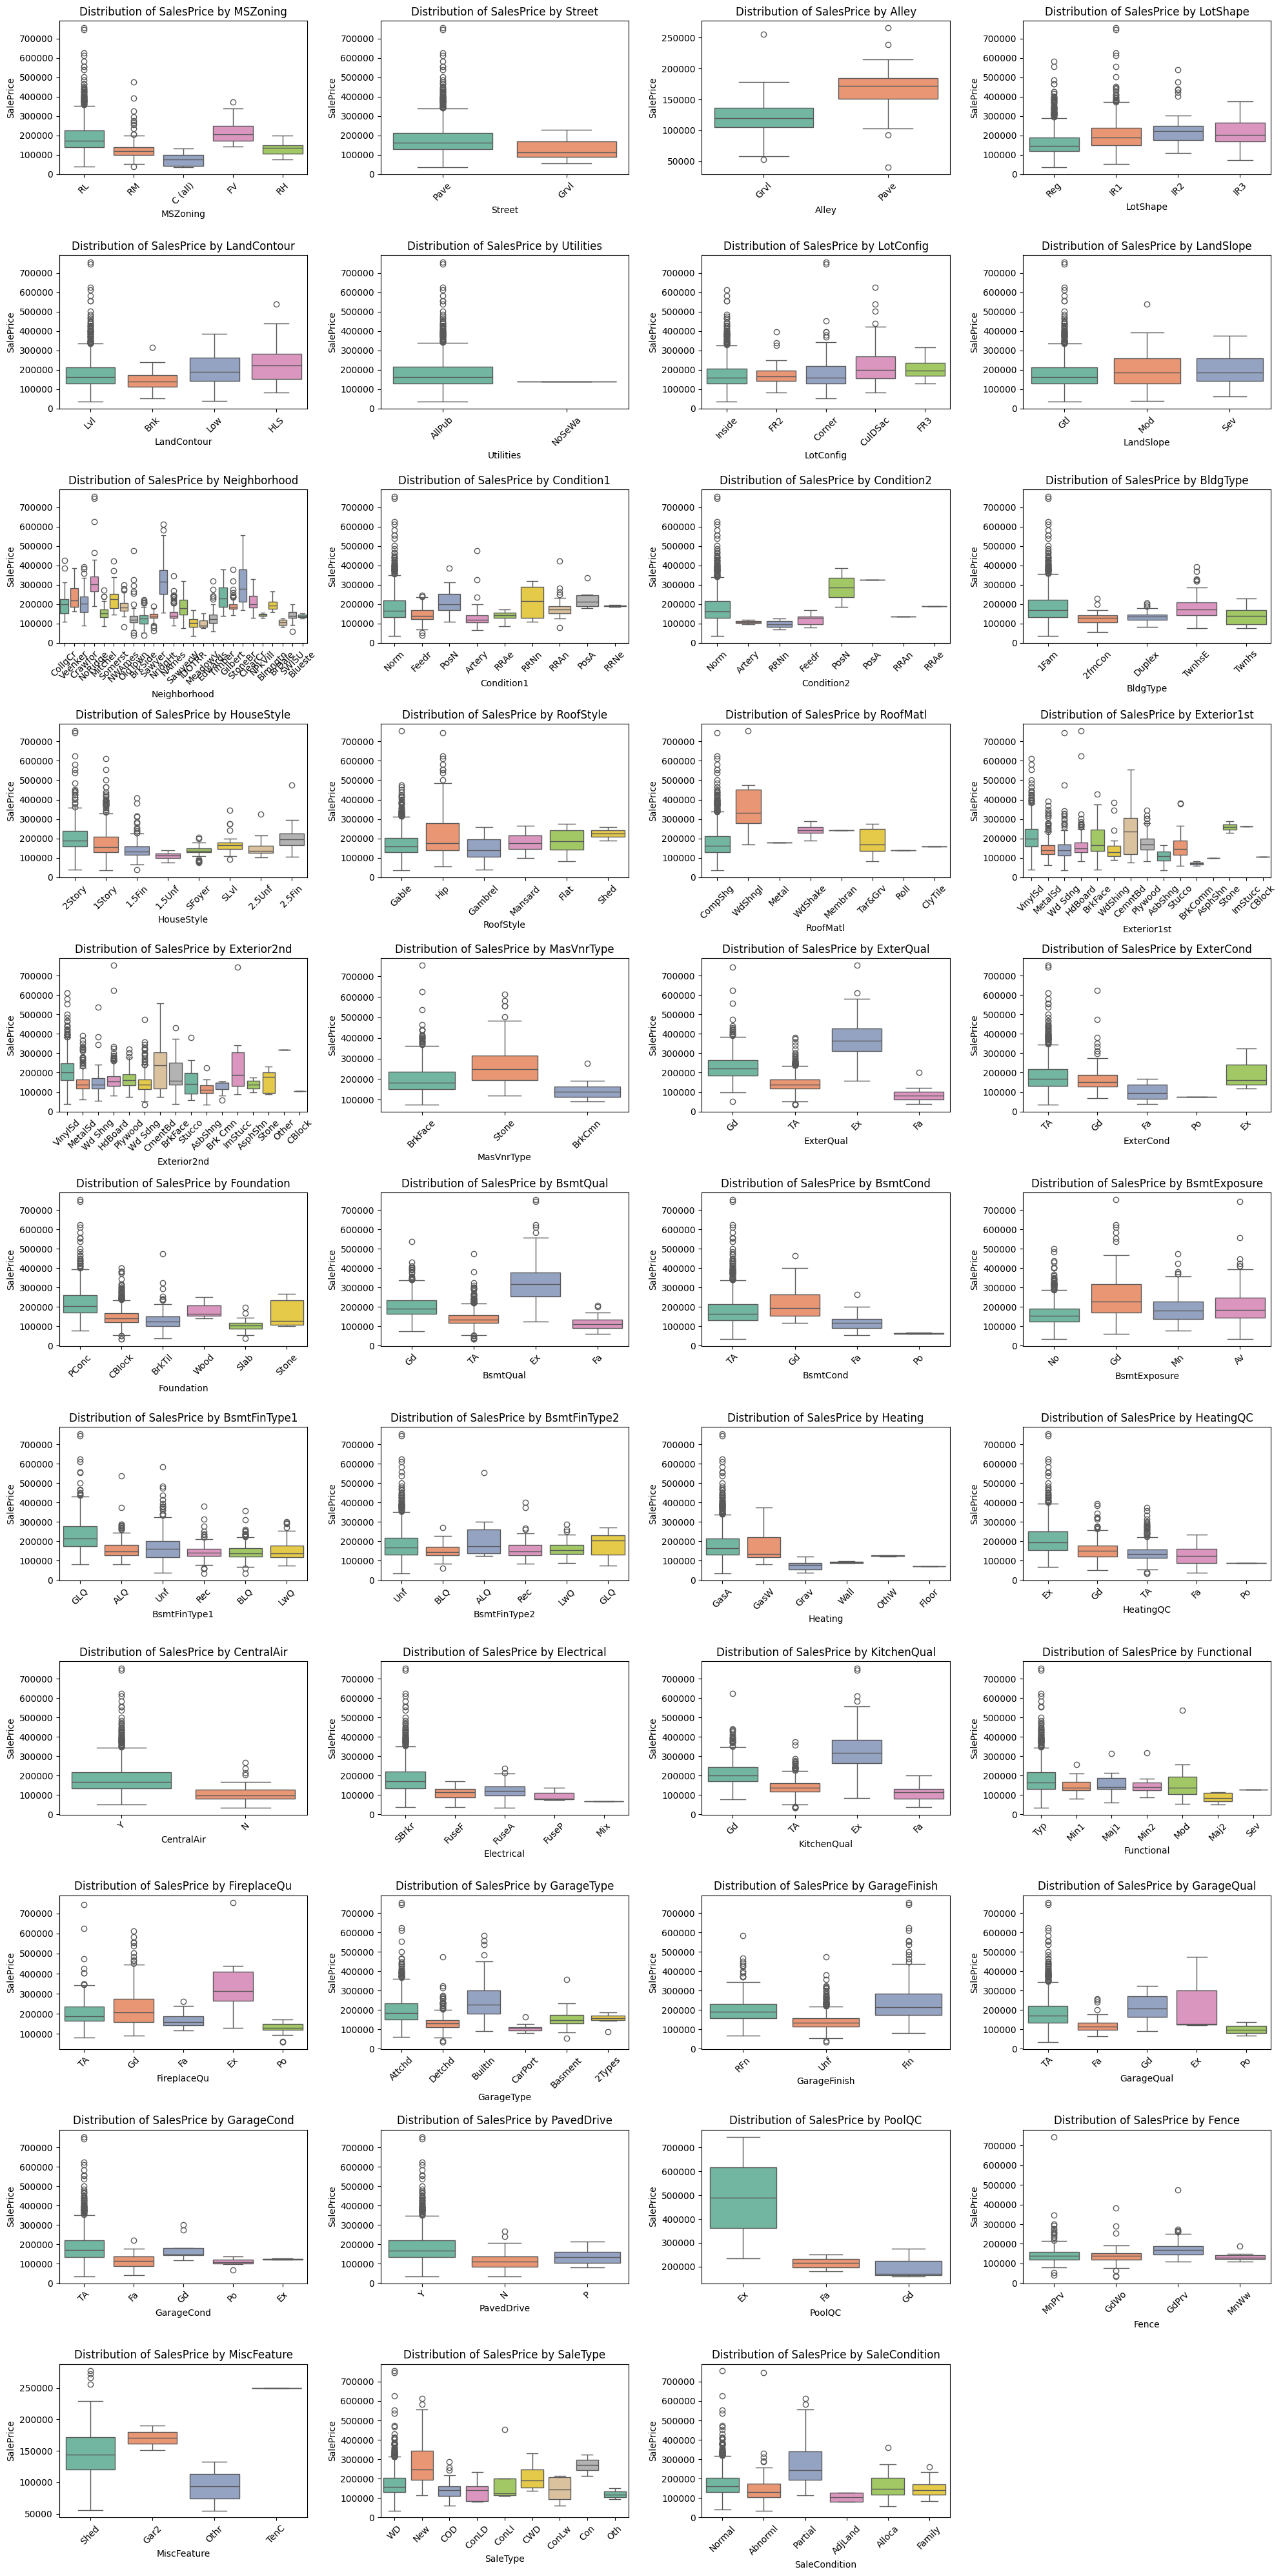

In [39]:
# Plot distribution of SalesPrice vs each categorical column
plt.figure(figsize=(20, 40))

for i, col in enumerate(categorical_columns):
    plt.subplot(11, 4, i + 1)  # Adjust the grid size based on the number of categorical columns
    sns.boxplot(x=df_train[col], y=df_train['SalePrice'], palette='Set2')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title(f'Distribution of SalesPrice by {col}')

plt.tight_layout()
plt.show()

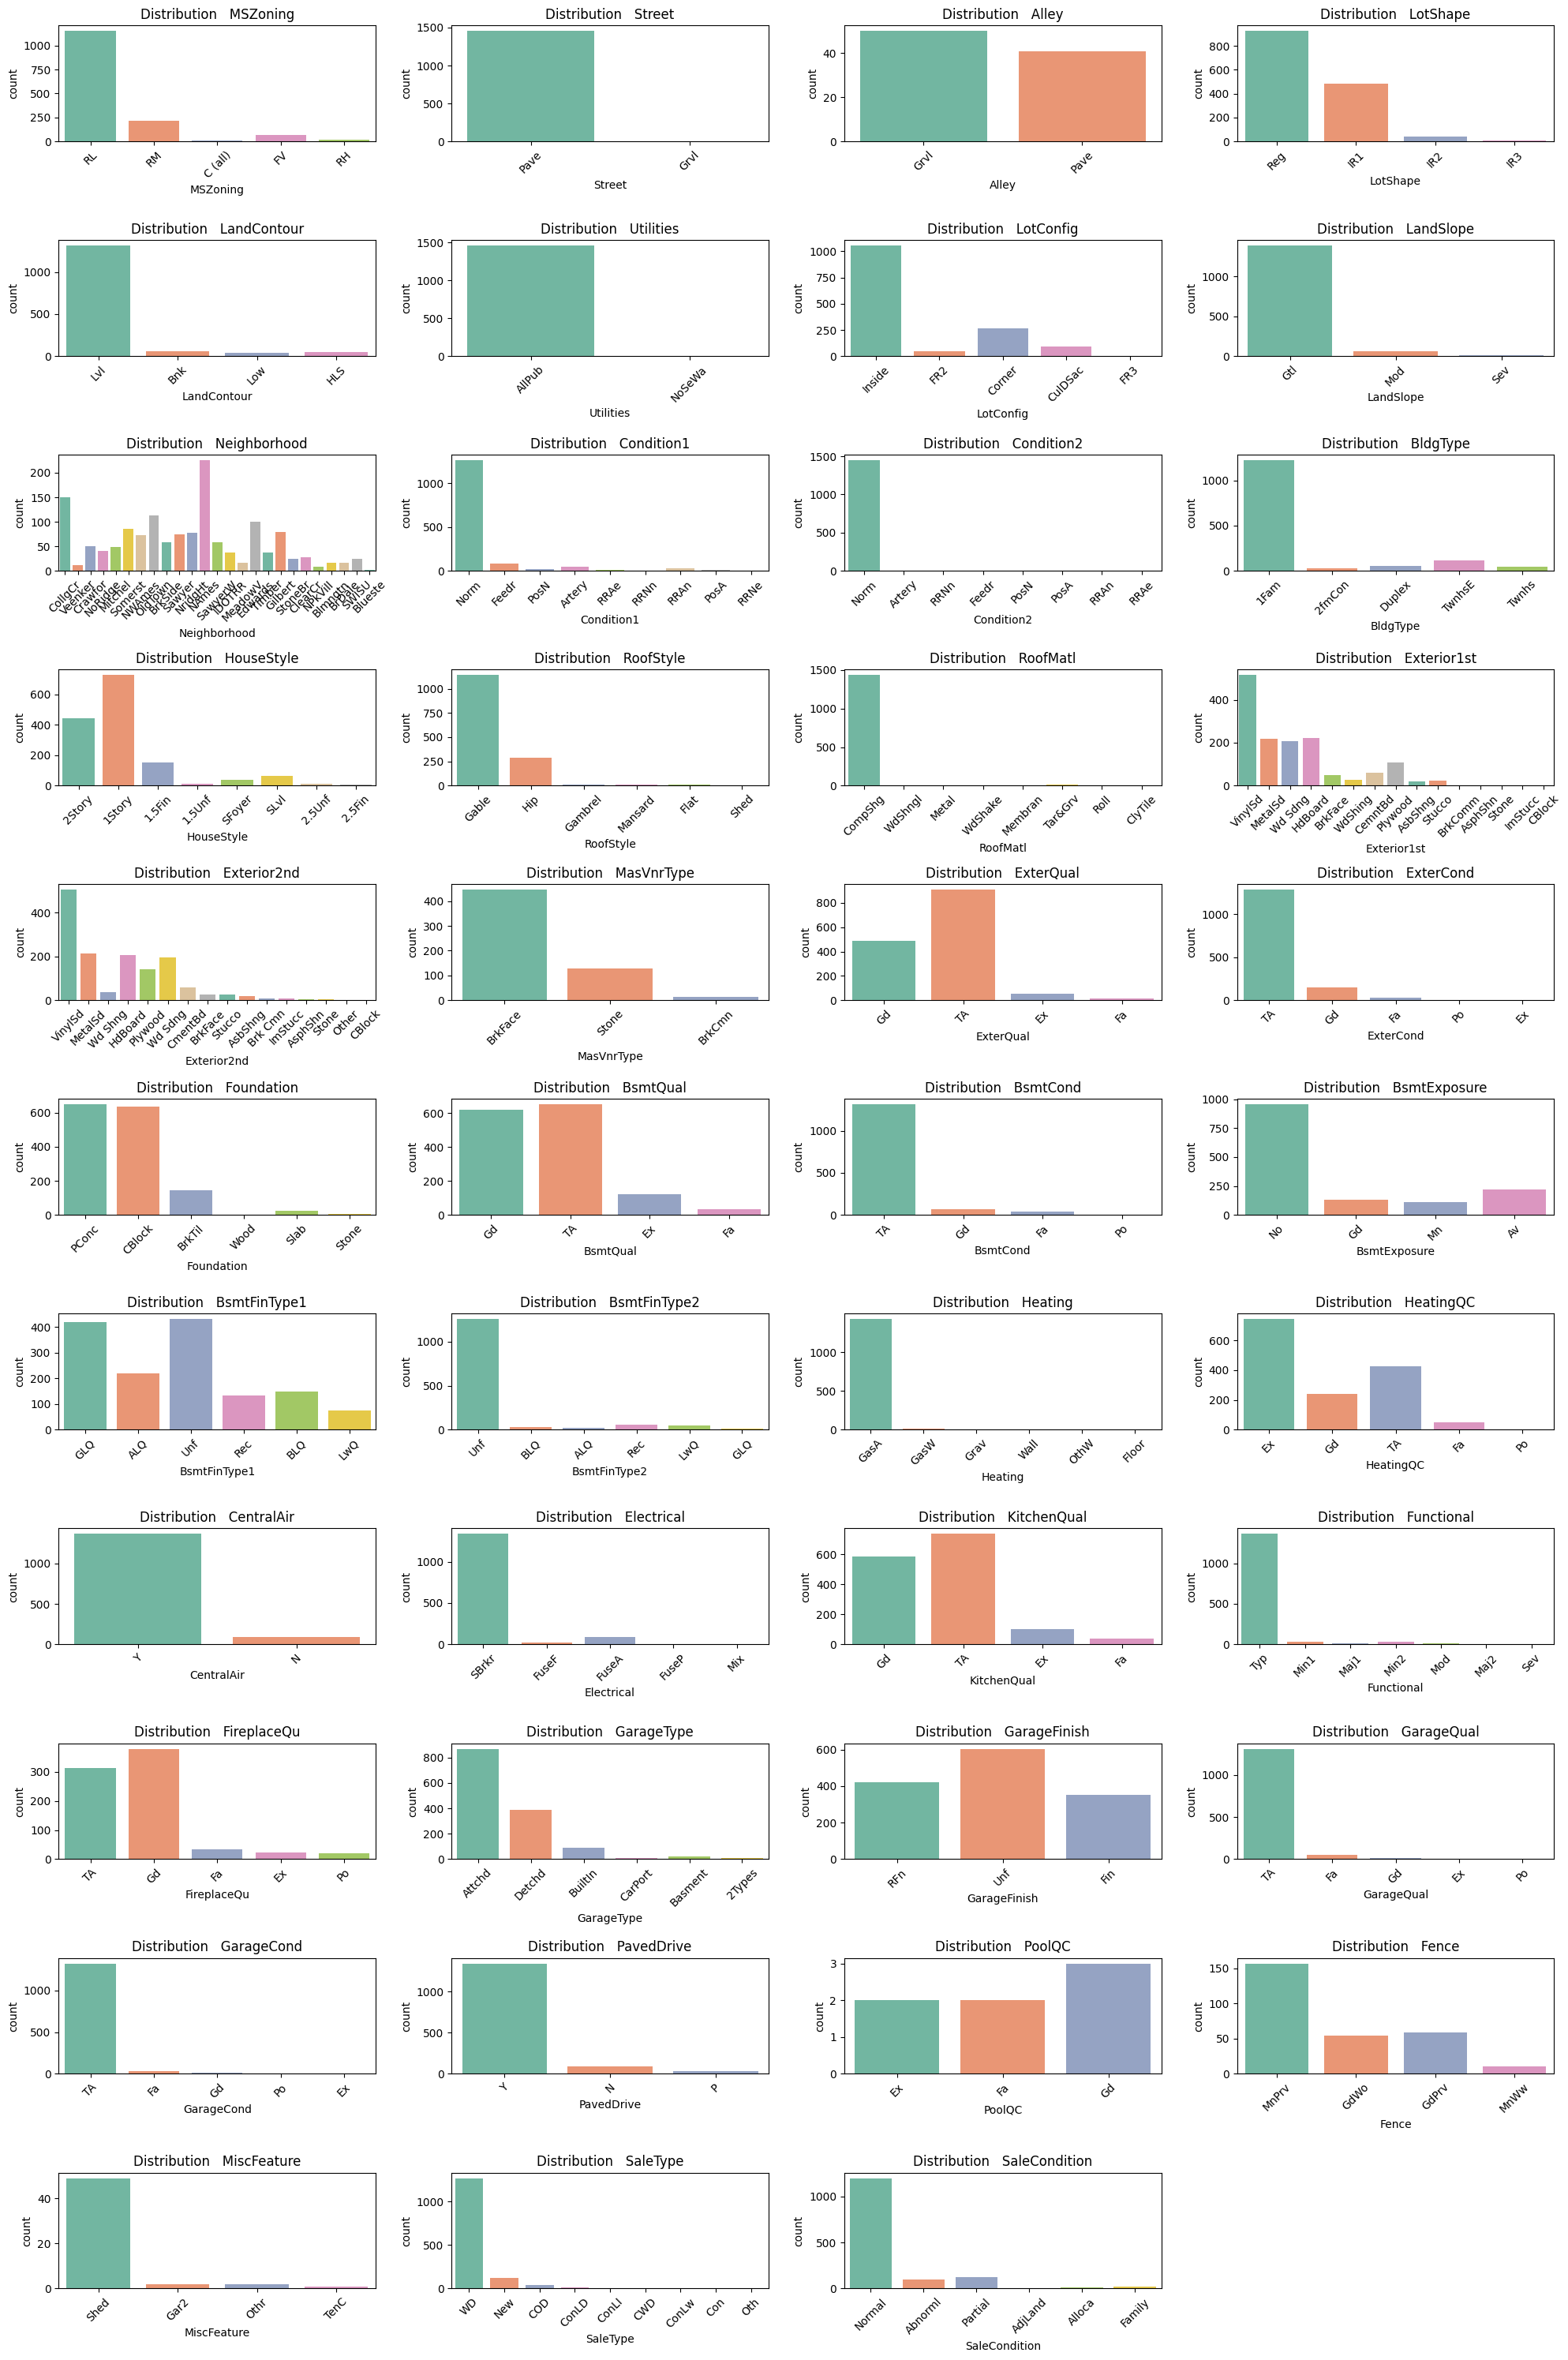

In [41]:
# Plot distribution of SalesPrice vs each categorical column
plt.figure(figsize=(20, 30))

for i, col in enumerate(categorical_columns):
    plt.subplot(11, 4, i + 1)  # Adjust the grid size based on the number of categorical columns
    sns.countplot(x=df_train[col], palette="Set2")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title(f'Distribution   {col}')

plt.tight_layout()
plt.show()

### Numerical Variables Distributions and Correlations Pairplots

In [14]:
# Compute the correlation matrix
correlation_matrix = df_train[numerical_columns].corr()

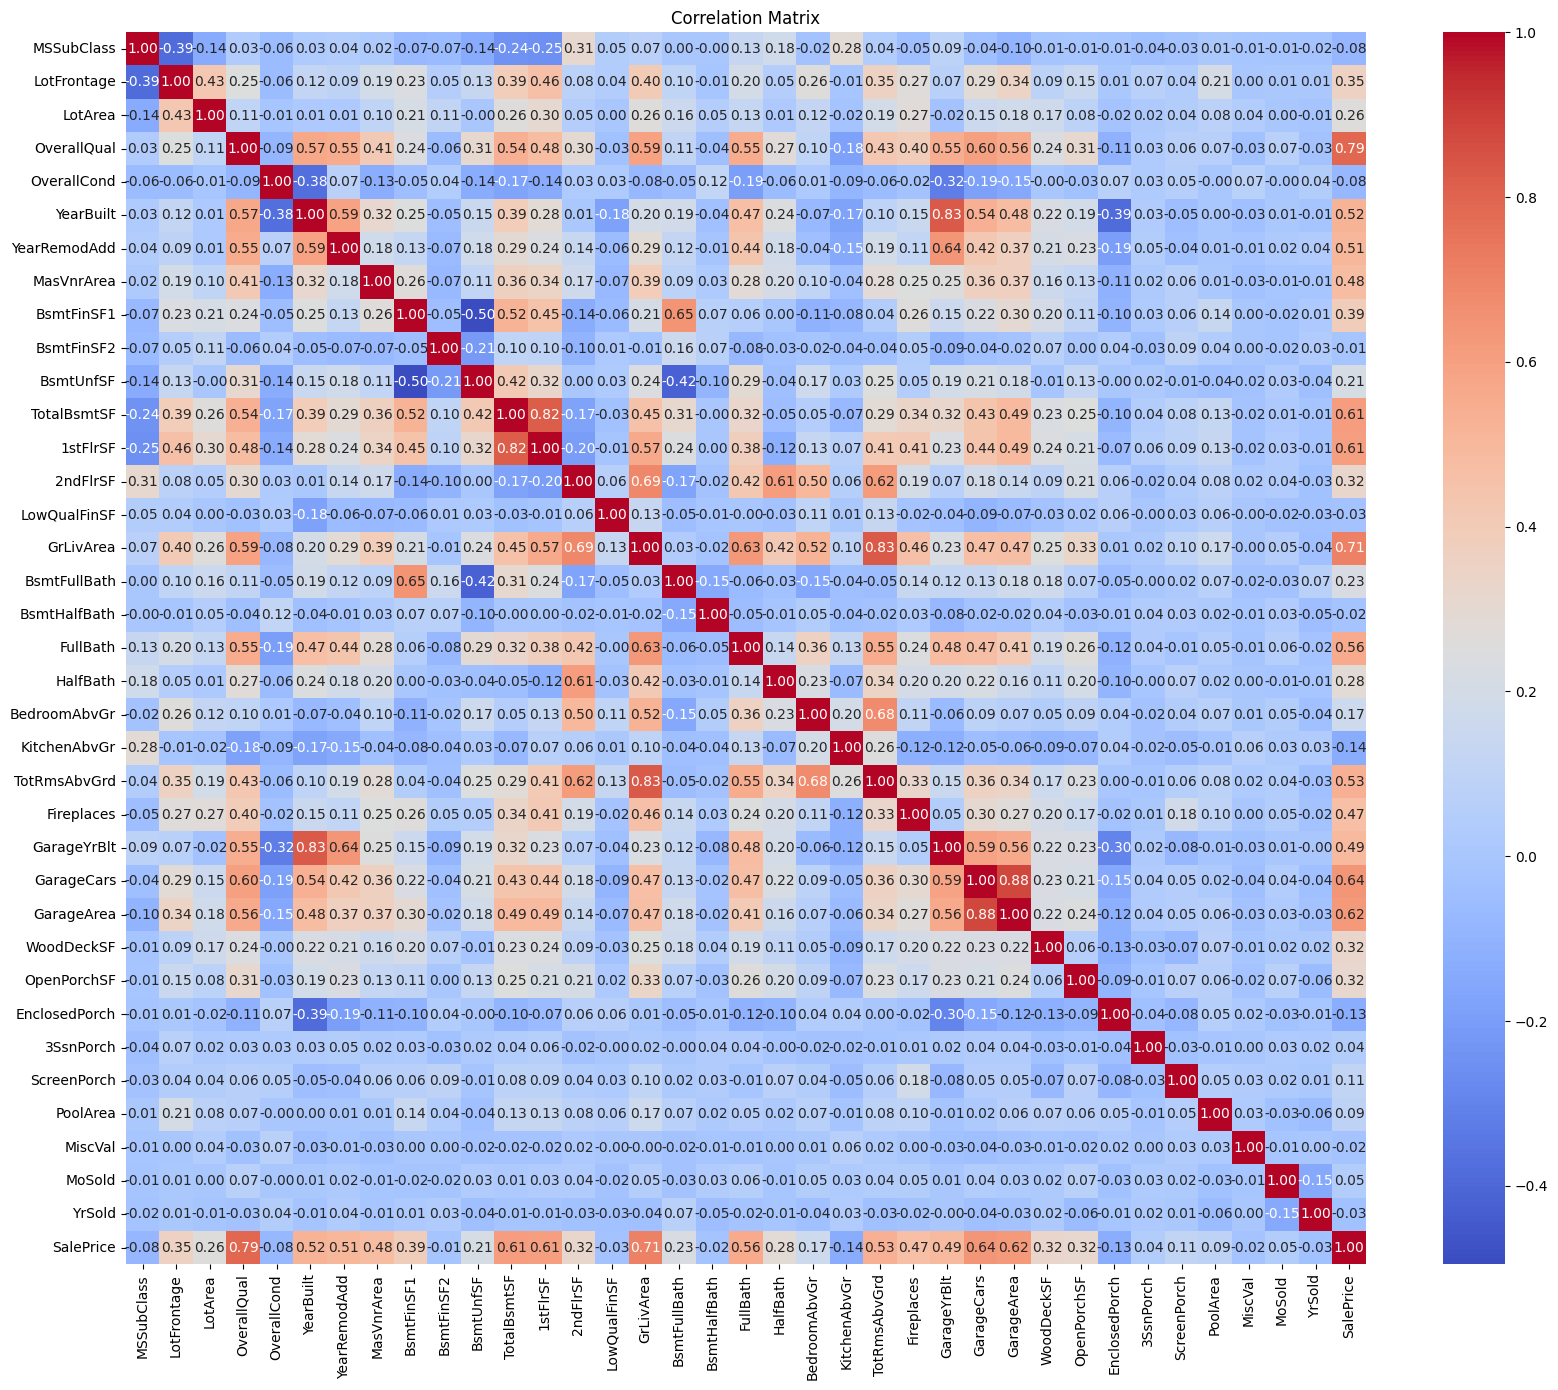

In [43]:
# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Set plot labels
plt.title('Correlation Matrix')
plt.show()

In [15]:
selected_columns = correlation_matrix['SalePrice'].sort_values(ascending=False).head(11).index

In [50]:
selected_columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

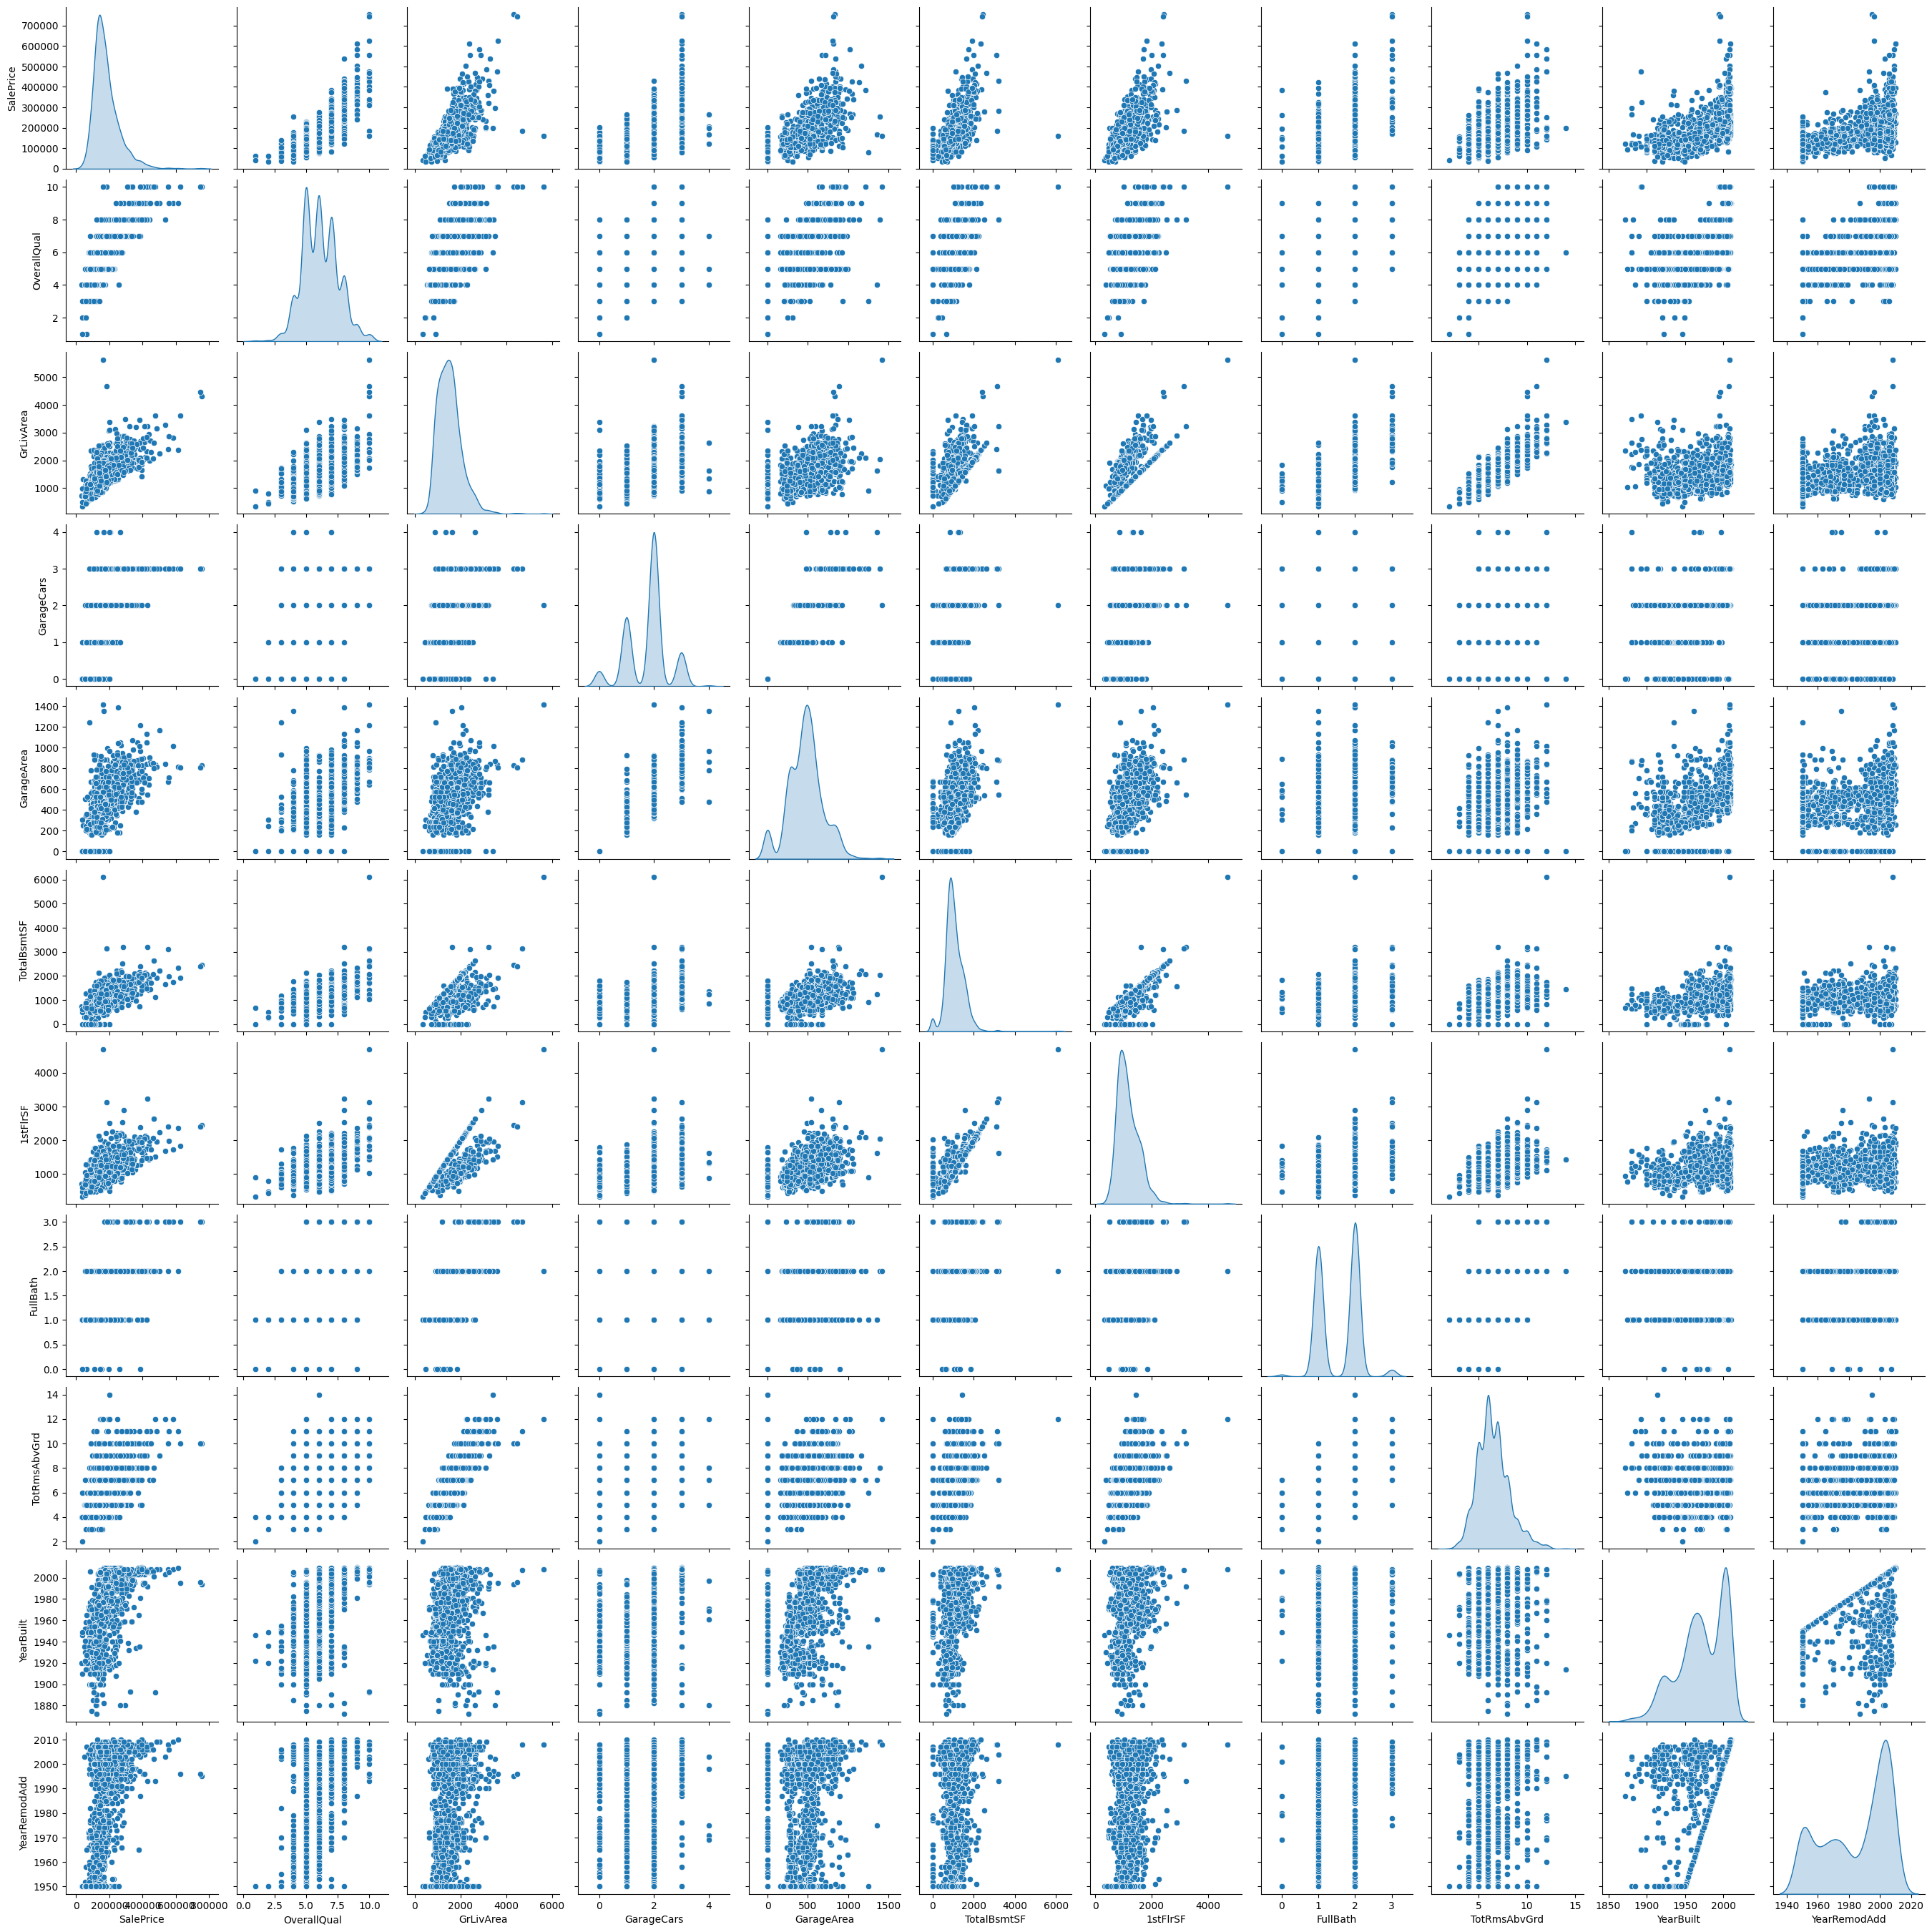

In [51]:
# Create pairplot with KDE only on the diagonal
sns.pairplot(df_train[selected_columns], diag_kind='kde')

# Show the plot
plt.show()

In [10]:
df_train[numerical_columns].shape

(1460, 37)

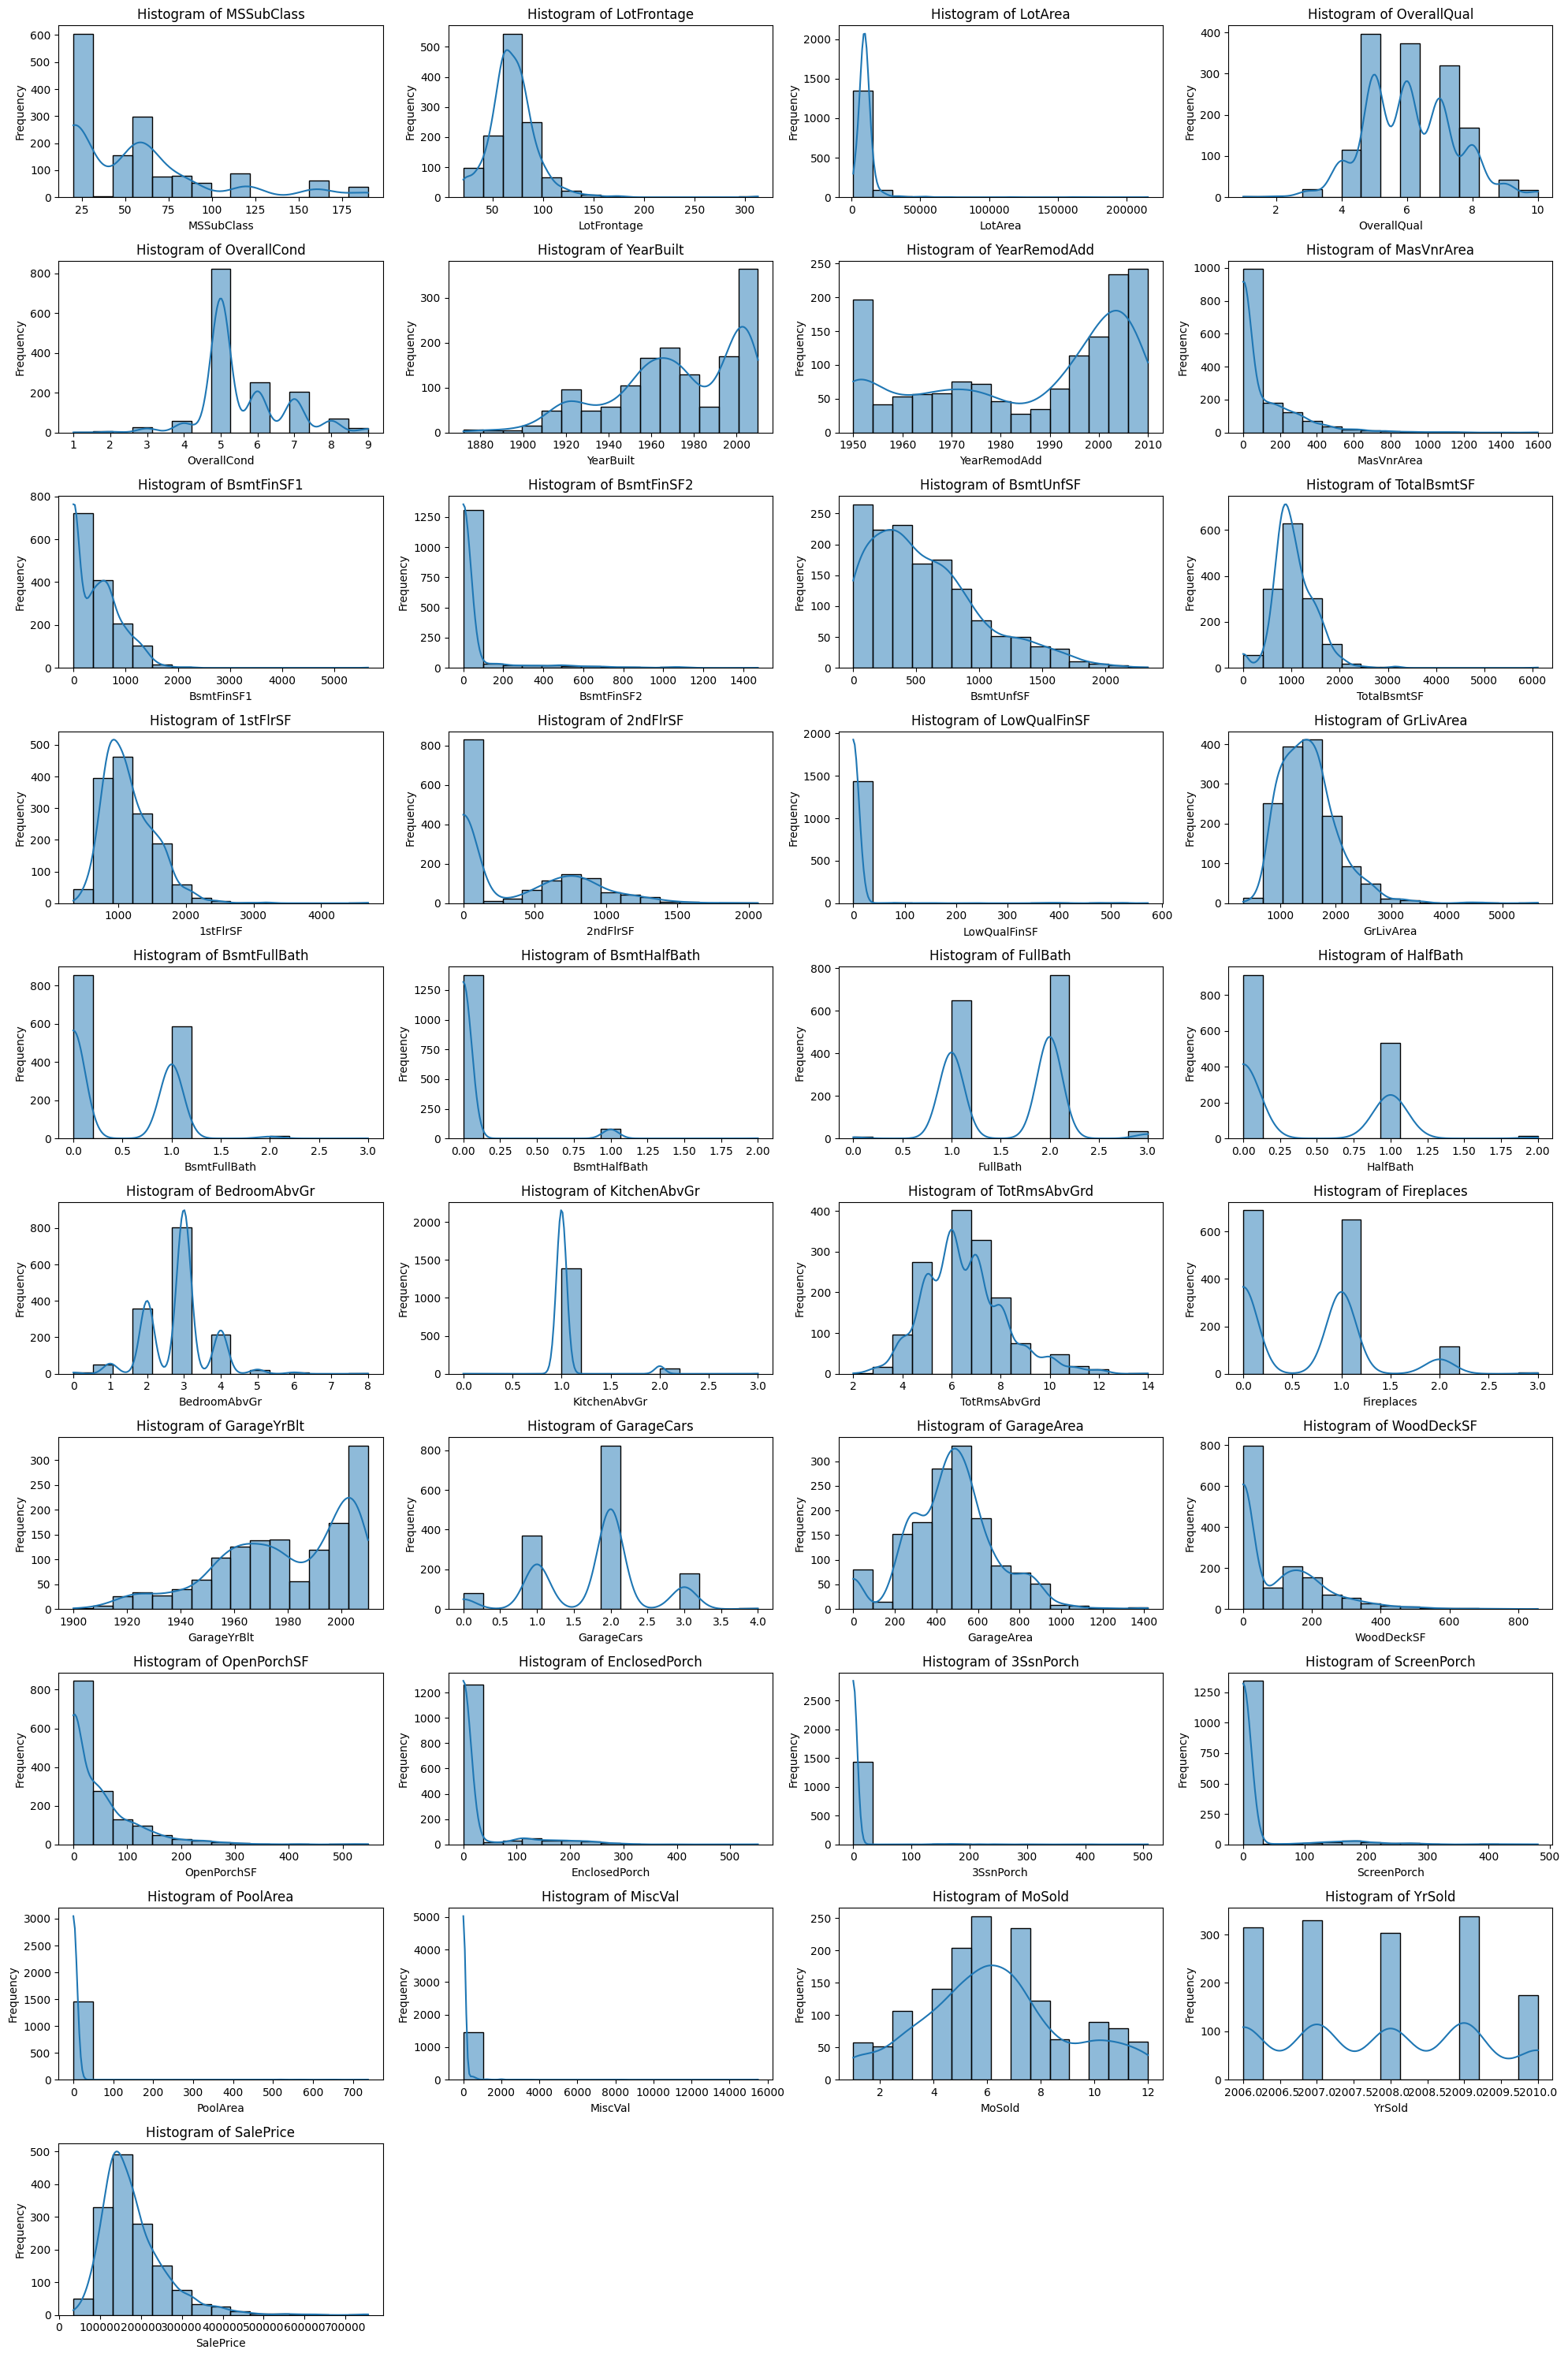

In [55]:
 # Set up the matplotlib figure with subplots
plt.figure(figsize=(20, 30))

# Loop through each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    plt.subplot(10, 4, i + 1)  # Adjust the number of rows and columns as needed
    sns.histplot(df_train[col], kde=True, bins=15)  # 'kde=True' adds a kernel density estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

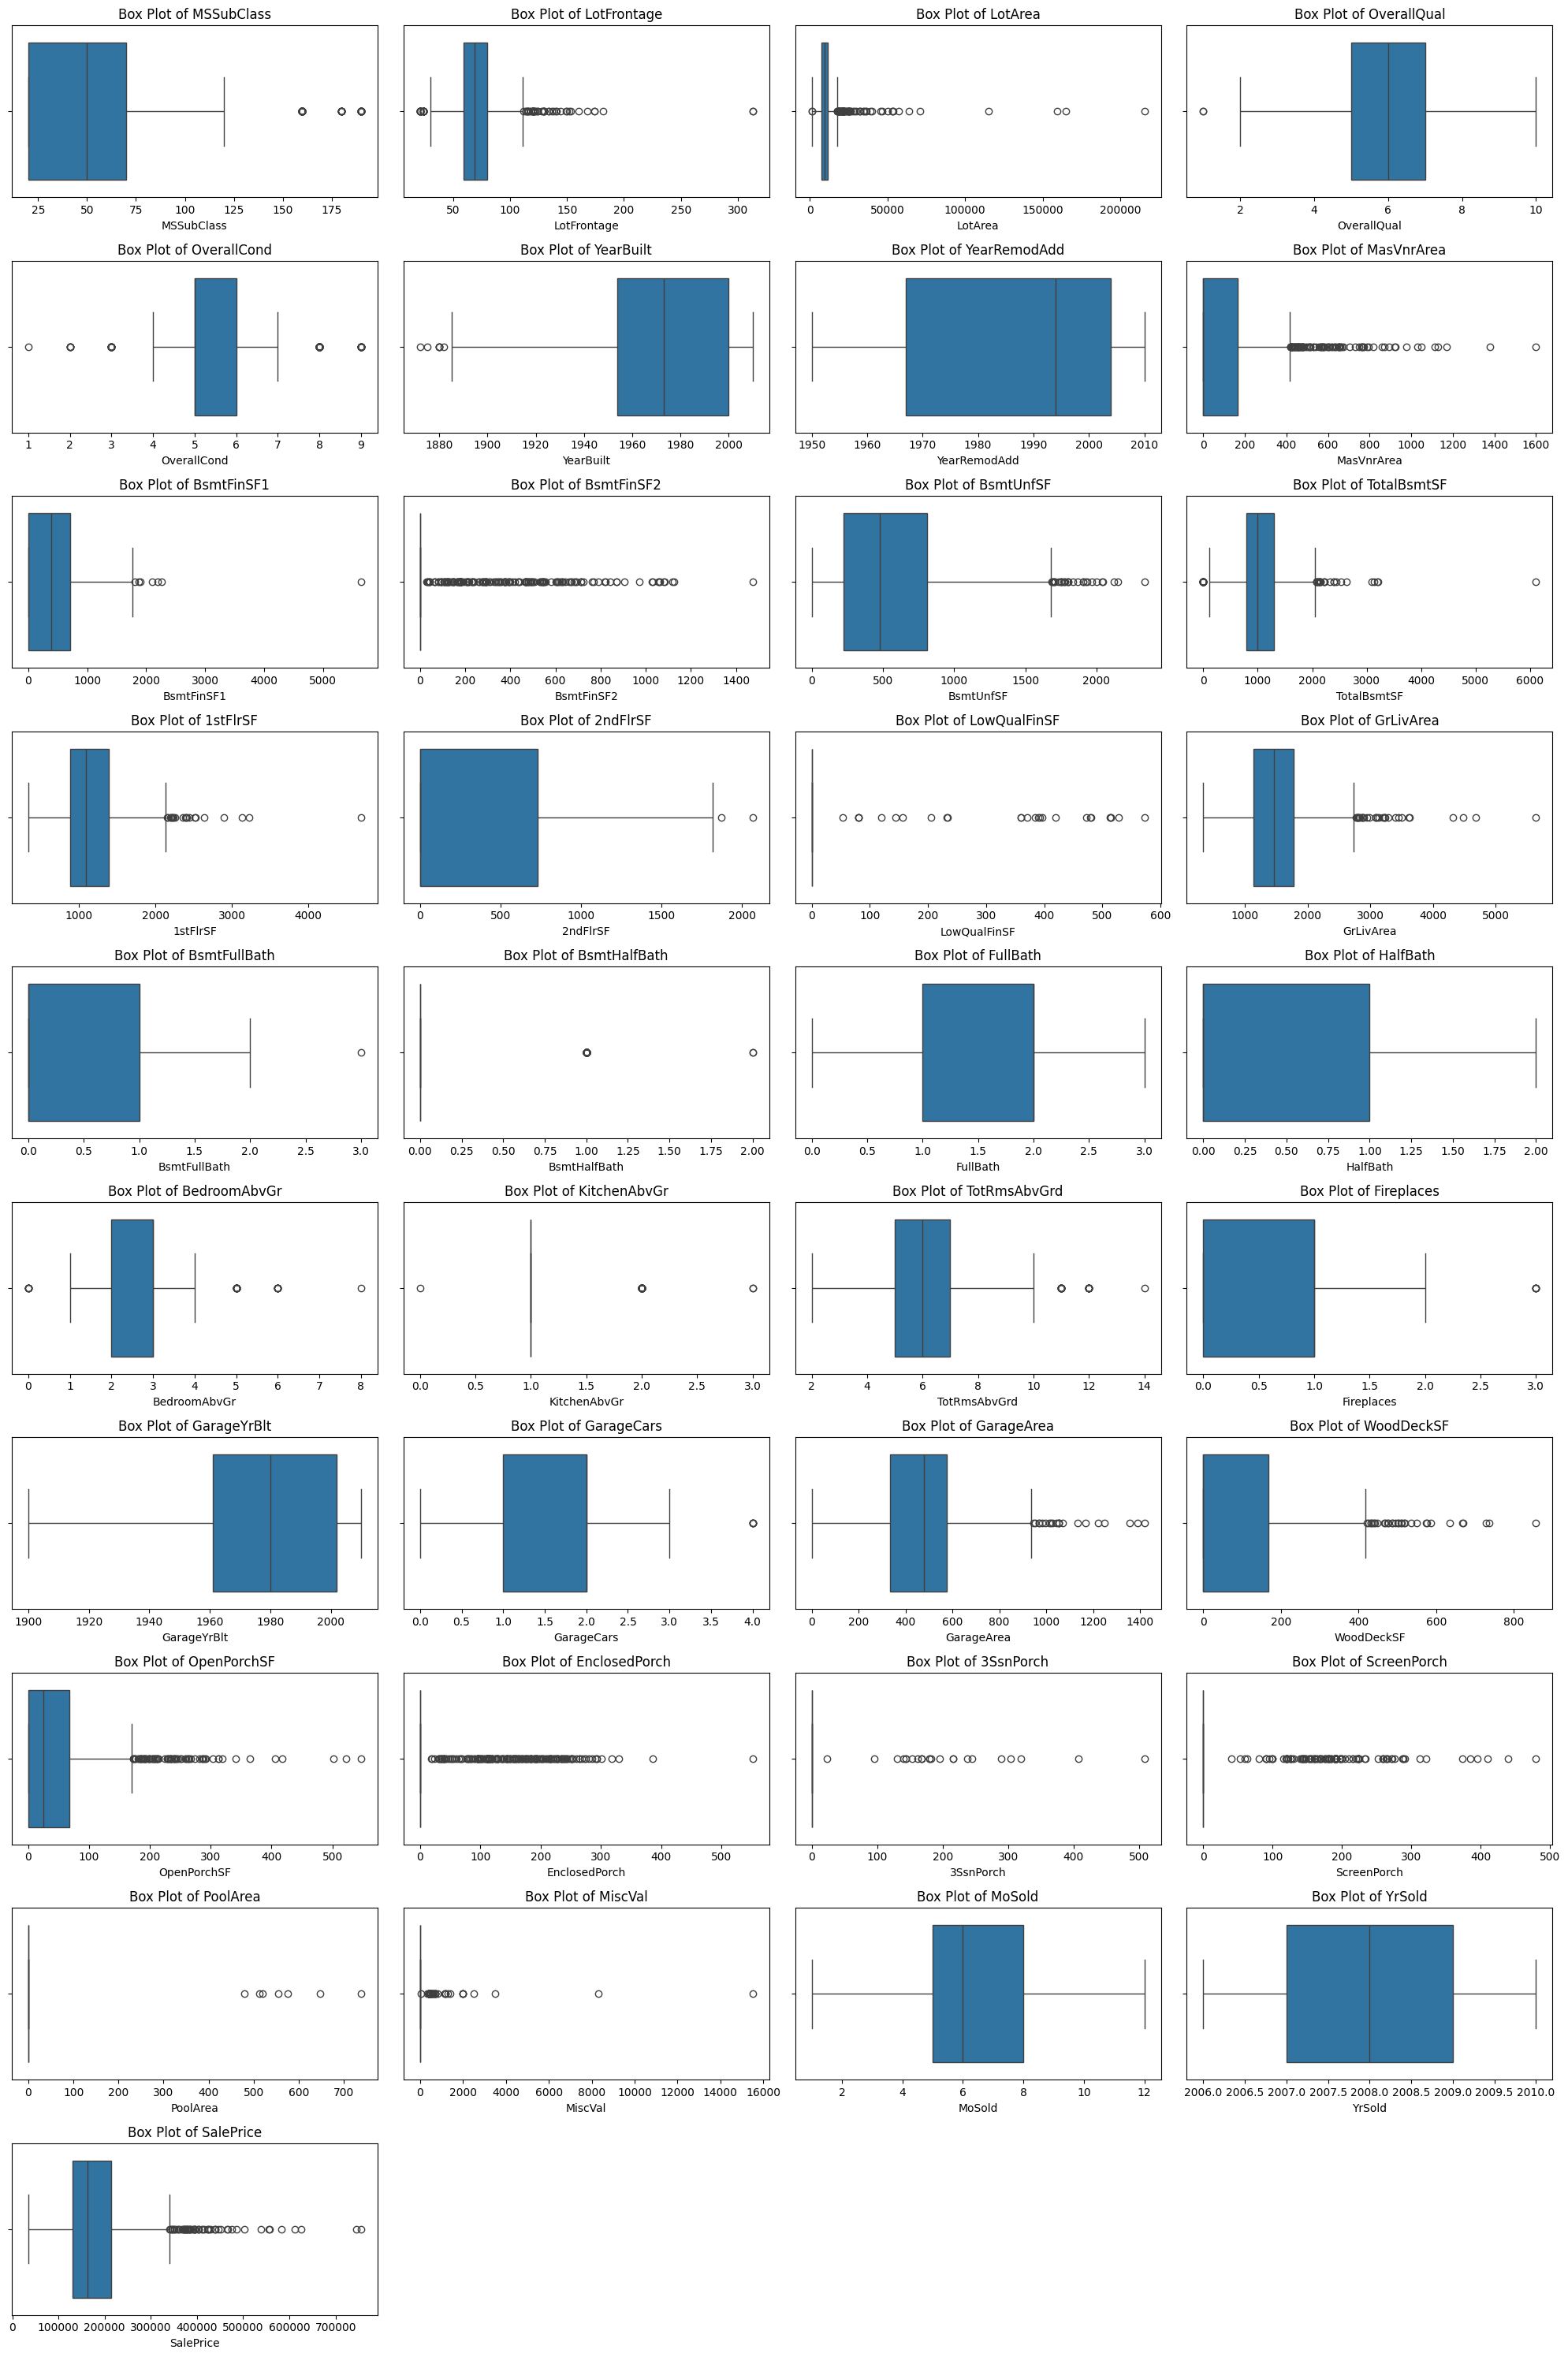

In [12]:
# Set up the matplotlib figure with subplots
plt.figure(figsize=(20, 30))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns):
    plt.subplot(10, 4, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(data=df_train, x=col)  # Box plot for each numerical column
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [173]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Feature Engineering


#### Drop Columns with missing values more than 60%

In [19]:
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature' ]

### Missing Value Imputation

#### Categorical Data Impute

Impute all Garage Related columns missing data with 'No Garage'

In [223]:
other_categorical_columns = ['MasVnrType', 'FireplaceQu']
garage_columns = df_train[categorical_columns].columns[df_train[categorical_columns].columns.str.contains('Garage', case=False)].tolist()
# Ensure concatenation involves only flat lists
exclude_columns = garage_columns + other_categorical_columns + columns_to_drop
# Automatically detect remaining categorical columns
remaining_categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

# Define the categorical transformer with OneHotEncoder and imputers
categorical_transformer = Pipeline(steps=[
    ('imputer', ColumnTransformer(
        transformers=[
            ('garage_imputer', SimpleImputer(strategy='constant', fill_value='No Garage'), garage_columns),
            ('other_imputer', SimpleImputer(strategy='constant', fill_value='Not Available'), other_categorical_columns),
            ('most_frequent_imputer', SimpleImputer(strategy='most_frequent'), remaining_categorical_columns),
            ('drop_columns', 'drop', columns_to_drop)  # Drop unwanted columns
        ],
        remainder='passthrough'  # Keep other columns unchanged
    )),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Apply OneHotEncoder
])

#### Numerical Data Impute

In [21]:
df_train[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath     

In [26]:
X = df_train.loc[:, df_train.columns != "SalePrice"]
y = df_train['SalePrice']

In [262]:
# Define the remaining numerical columns
remaining_numerical_columns = [col for col in numerical_columns if col not in ['GarageYrBlt', 'MasVnrArea', 'YearBuilt','YrSold', 'LotFrontage', 'SalePrice']]

# Define the numerical transformer with imputers
numerical_transformer = ColumnTransformer(
    transformers=[
        ('garage_year_imputer', SimpleImputer(strategy='constant', fill_value=0), ['GarageYrBlt', 'MasVnrArea', 'YearBuilt','YrSold']),
        ('lot_frontage_knn', KNNImputer(n_neighbors=5), ['LotFrontage']),
        ('remaining_numerical_cols_mean', SimpleImputer(strategy='mean'), remaining_numerical_columns)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

In [263]:
# Exclude the target column 'SalePrice' from numerical_columns
numerical_columns = [col for col in numerical_columns if col != "SalePrice"]

# Combine categorical and numerical transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns),  # Apply to categorical columns
        ('numerical', numerical_transformer, numerical_columns)  # Apply to numerical columns
    ]
)

# Create a pipeline with PCA to reduce dimensionality after preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing for both categorical and numerical columns
])

In [264]:
# Fit the pipeline on the data
pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('garage_imputer',
                                                                                                    SimpleImputer(fill_value='No '
                                                                                                                             'Garage',
                                                                                                                  strategy='constant'),
                                                                                                    ['GarageType',
                                                                                                     'GarageFinish',
                                                                                                     'GarageQual',
                                                                                                     'GarageCond']),
                                                                                                   ('other_imputer',
                                                                                                    SimpleImputer(fill_value='Not '
                                                                                                                             'Availa...
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])]))])

In [265]:
# Apply the pipeline transformation to the data
X_transformed = pipeline.transform(X)

In [268]:
X_transformed.shape

(1460, 241)

In [289]:


# Create a list of categorical columns excluding those in columns_to_drop
cat_col = [col for col in categorical_columns if col not in columns_to_drop]
onehot_encoder = categorical_transformer.named_steps['onehot']

# Adjust the retrieval of feature names to match the transformed data's columns
# Get feature names after one-hot encoding (if any)
categorical_feature_names = onehot_encoder.get_feature_names_out(cat_col)

numerical_transformer.fit(X[numerical_columns])
# Check numerical feature names
numerical_feature_names = numerical_transformer.get_feature_names_out(numerical_columns)

# Combine the feature names from both categorical and numerical columns
feature_names = list(categorical_feature_names) + list(numerical_feature_names)

# Ensure the number of columns in feature_names matches the number of columns in X_transformed
print("Number of feature names:", len(feature_names))
print("Number of columns in transformed data:", X_transformed.shape[1])

Number of feature names: 241
Number of columns in transformed data: 241


In [270]:
# Convert sparse matrix to dense if needed
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# Create DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

In [273]:
X_transformed_df.head(1)

MSZoning_Attchd  MSZoning_Basment  MSZoning_BuiltIn  MSZoning_CarPort  \
0              1.0               0.0               0.0               0.0   

   MSZoning_Detchd  MSZoning_No Garage  Street_No Garage  Street_RFn  \
0              0.0                 0.0               0.0         1.0   

   Street_Unf  LotShape_Fa  ...  remaining_numerical_cols_mean__GarageCars  \
0         0.0          0.0  ...                                        2.0   

   remaining_numerical_cols_mean__GarageArea  \
0                                      548.0   

   remaining_numerical_cols_mean__WoodDeckSF  \
0                                        0.0   

   remaining_numerical_cols_mean__OpenPorchSF  \
0                                        61.0   

   remaining_numerical_cols_mean__EnclosedPorch  \
0                                           0.0   

   remaining_numerical_cols_mean__3SsnPorch  \
0                                       0.0   

   remaining_numerical_cols_mean__ScreenPorch  \
0                                         0.0   

   remaining_numerical_cols_mean__PoolArea  \
0                                      0.0   

   remaining_numerical_cols_mean__MiscVal  \
0                                     0.0   

   remaining_numerical_cols_mean__MoSold  
0                                    2.0  

[1 rows x 241 columns]

In [274]:
test_transformed = pipeline.transform(df_test)

 # Convert sparse matrix to dense if needed
if hasattr(test_transformed, "toarray"):
    test_transformed = test_transformed.toarray()

# Create DataFrame
test_transformed_df = pd.DataFrame(test_transformed, columns=feature_names)

In [275]:
test_transformed_df.head(1)

MSZoning_Attchd  MSZoning_Basment  MSZoning_BuiltIn  MSZoning_CarPort  \
0              1.0               0.0               0.0               0.0   

   MSZoning_Detchd  MSZoning_No Garage  Street_No Garage  Street_RFn  \
0              0.0                 0.0               0.0         0.0   

   Street_Unf  LotShape_Fa  ...  remaining_numerical_cols_mean__GarageCars  \
0         1.0          0.0  ...                                        1.0   

   remaining_numerical_cols_mean__GarageArea  \
0                                      730.0   

   remaining_numerical_cols_mean__WoodDeckSF  \
0                                      140.0   

   remaining_numerical_cols_mean__OpenPorchSF  \
0                                         0.0   

   remaining_numerical_cols_mean__EnclosedPorch  \
0                                           0.0   

   remaining_numerical_cols_mean__3SsnPorch  \
0                                       0.0   

   remaining_numerical_cols_mean__ScreenPorch  \
0                                       120.0   

   remaining_numerical_cols_mean__PoolArea  \
0                                      0.0   

   remaining_numerical_cols_mean__MiscVal  \
0                                     0.0   

   remaining_numerical_cols_mean__MoSold  
0                                    6.0  

[1 rows x 241 columns]

#### Handle Outlier in target columns 'SalePrice'

In [276]:
y = df_train['SalePrice']

In [277]:
def handle_outlier(column,p_min =0.01, p_max = 0.99):
    """
    Processes a DataFrame column by:
    - Calculating min and max percentiles
    - Capping values below min percentile and above max percentile
    - Replacing missing values with the column's median

    Parameters:
    column (pd.Series): The column to process

    Returns:
    pd.Series: The processed column
    """
    # Calculate the min and max percentiles
    p_min_value = column.quantile(p_min)
    p_max_value = column.quantile(p_max)

    # Replace values below min percentile and above max percentile
    column = column.clip(lower=p_min_value, upper=p_max_value)

    # Replace missing values with the median
    median = column.median()
    column = column.fillna(median)

    return column

In [278]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [279]:
y = handle_outlier(y, p_min=0.005, p_max=0.995 )

In [280]:
y.describe()

count      1460.000000
mean     180470.903644
std       76515.706062
min       55000.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      527331.915000
Name: SalePrice, dtype: float64

### Apply Machine Learning Algorithms

#### XGBoost Regression

In [ ]:
# Define the XGBoost model for regression
xgb_model = XGBRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [   1000],
    'learning_rate': [  0.05, 0.1],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # Use negative MSE as scoring
    verbose=1
)
grid_search_xgb.fit(X_transformed_df, y)

# Print best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best CV Score (Negative MSE):", grid_search_xgb.best_score_)

# Get the best model from grid search
best_xg_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


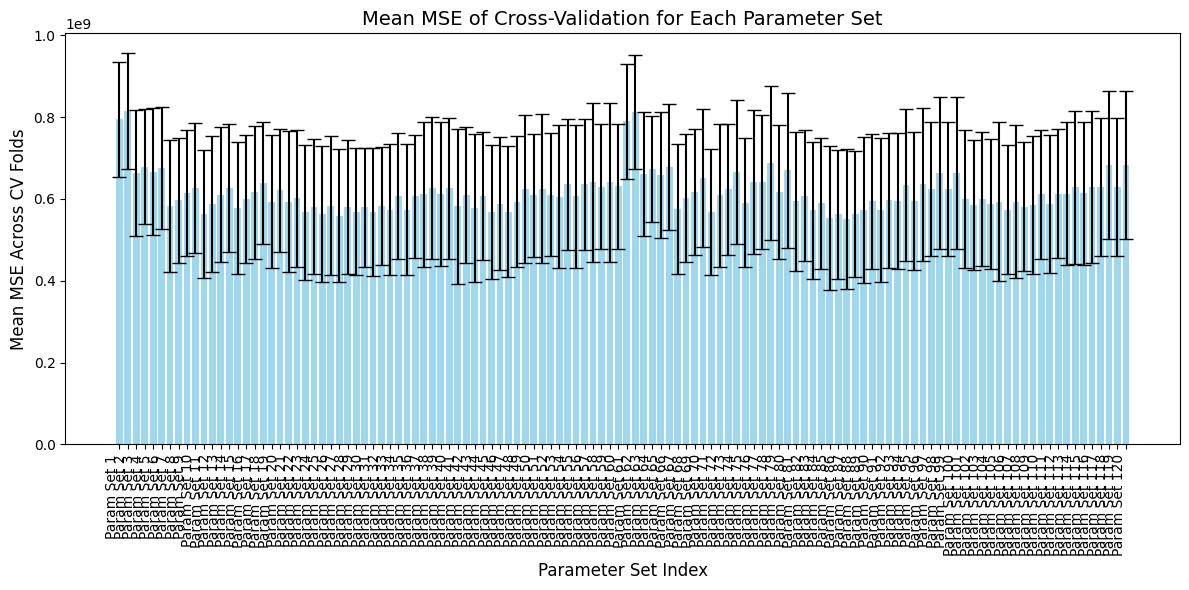

In [282]:
# Get the mean test scores for each parameter combination
mean_test_scores = grid_search_xgb.cv_results_['mean_test_score']
std_test_scores = grid_search_xgb.cv_results_['std_test_score']

# Convert negative MSE to positive MSE for better interpretation
mean_test_scores = -mean_test_scores  # Convert negative MSE to positive
std_test_scores = std_test_scores

# Create a bar chart
x_labels = [f"Param Set {i+1}" for i in range(len(mean_test_scores))]
x_pos = np.arange(len(mean_test_scores))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel("Parameter Set Index", fontsize=12)
plt.ylabel("Mean MSE Across CV Folds", fontsize=12)
plt.title("Mean MSE of Cross-Validation for Each Parameter Set", fontsize=14)
plt.xticks(x_pos, x_labels, rotation=90, ha='right', fontsize=10)
plt.tight_layout()

plt.show()

In [283]:

# Make predictions on the test set
y_pred_xgb = best_xg_model.predict(test_transformed_df)


In [284]:
output_xgb = pd.DataFrame(y_pred_xgb, index=df_test.index, columns=['Predicted Values']).reset_index()

In [285]:
output_xgb.head(20)

Id  Predicted Values
0   1461     128814.031250
1   1462     160793.328125
2   1463     185874.437500
3   1464     192766.218750
4   1465     175229.750000
5   1466     174322.375000
6   1467     174075.078125
7   1468     169505.203125
8   1469     178925.546875
9   1470     129382.328125
10  1471     196242.984375
11  1472      93990.765625
12  1473      96205.914062
13  1474     156546.734375
14  1475     124762.046875
15  1476     386658.000000
16  1477     267724.218750
17  1478     303930.843750
18  1479     245295.984375
19  1480     444857.312500

In [286]:
best_xg_model.feature_importances_


array([1.06368372e-02, 3.20886960e-04, 4.39576805e-04, 9.95076145e-04,
       2.31588562e-03, 7.21528631e-05, 0.00000000e+00, 9.93059599e-04,
       6.47621928e-04, 1.23091522e-04, 6.05504378e-04, 0.00000000e+00,
       0.00000000e+00, 1.03784853e-03, 3.37082834e-04, 1.89462095e-04,
       0.00000000e+00, 9.15678102e-05, 1.16180675e-03, 1.23111706e-03,
       1.39603647e-03, 8.21481401e-04, 5.92565455e-04, 1.16263446e-03,
       2.24708356e-02, 1.05038821e-03, 9.09556693e-04, 2.29987549e-03,
       2.23417475e-04, 7.31128501e-03, 4.15095575e-02, 3.81093065e-04,
       4.37767827e-04, 2.16045361e-02, 1.10550656e-03, 1.03238609e-03,
       1.00473617e-03, 2.14831624e-03, 0.00000000e+00, 2.87198299e-03,
       1.06064894e-03, 8.14930769e-04, 5.57287014e-04, 1.16605288e-03,
       1.69494599e-02, 0.00000000e+00, 1.32345420e-04, 1.20788137e-03,
       1.81080832e-03, 4.16703057e-04, 6.15376607e-03, 2.22393218e-02,
       1.75936439e-04, 5.19497786e-04, 3.04864720e-04, 7.86870602e-04,
      

In [123]:
pc_importances

array([0.07952035, 0.5491737 , 0.04147686, 0.0444082 , 0.04514368,
       0.06313799, 0.06349806, 0.02946807, 0.03684035, 0.04733282],
      dtype=float32)

In [288]:

# Step 5: Create a DataFrame to show the importance of each original feature
importance_df = pd.DataFrame({
    'Original Feature': feature_names,  # Replace with actual feature names
    'Importance': best_xg_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                               Original Feature  Importance
212  remaining_numerical_cols_mean__OverallQual    0.212338
231   remaining_numerical_cols_mean__GarageCars    0.092506
138                             BsmtExposure_TA    0.085369
30                                 LandSlope_RM    0.041510
222    remaining_numerical_cols_mean__GrLivArea    0.034495
..                                          ...         ...
90                             ExterQual_2.5Fin    0.000000
152                                HeatingQC_Po    0.000000
75                             Exterior1st_RRNe    0.000000
76                             Exterior1st_RRNn    0.000000
120                            BsmtQual_WdShing    0.000000

[241 rows x 2 columns]


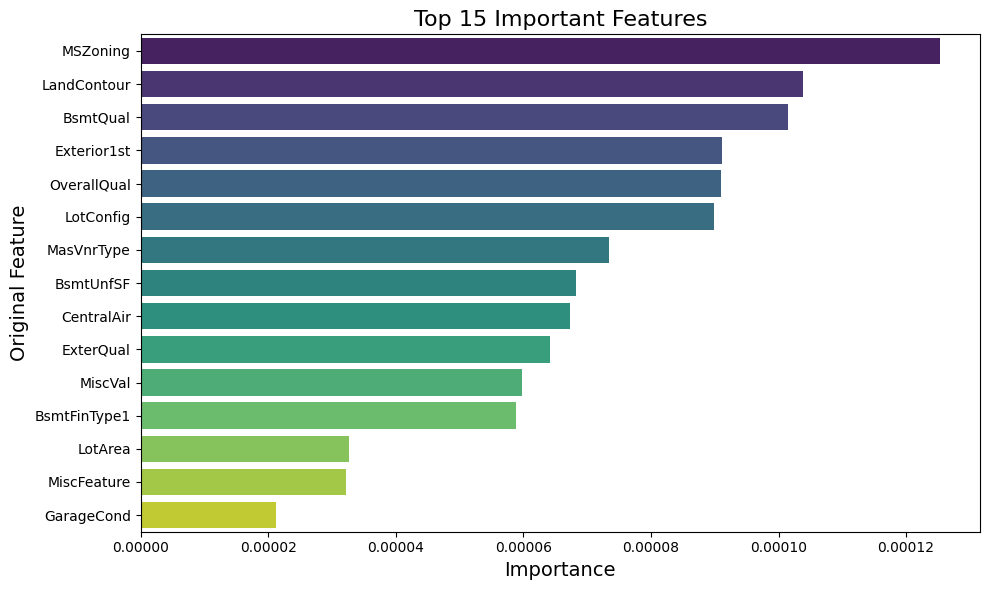

In [125]:
# Assuming the importance_df is already computed as described earlier:
# Sort the DataFrame by importance in descending order and select top 15 features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Original Feature', data=top_features, palette='viridis')

# Add labels and title
plt.title('Top 15 Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Original Feature', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()